In [7]:
timit_wav = "/dataHDD/chsaikeerthi/2024-chirumamilla/data/TIMIT/SA1ABC0/signal.wav"
keele_wav ="/dataHDD/chsaikeerthi/2024-chirumamilla/data/KEELE/f1nw0000/signal.wav"


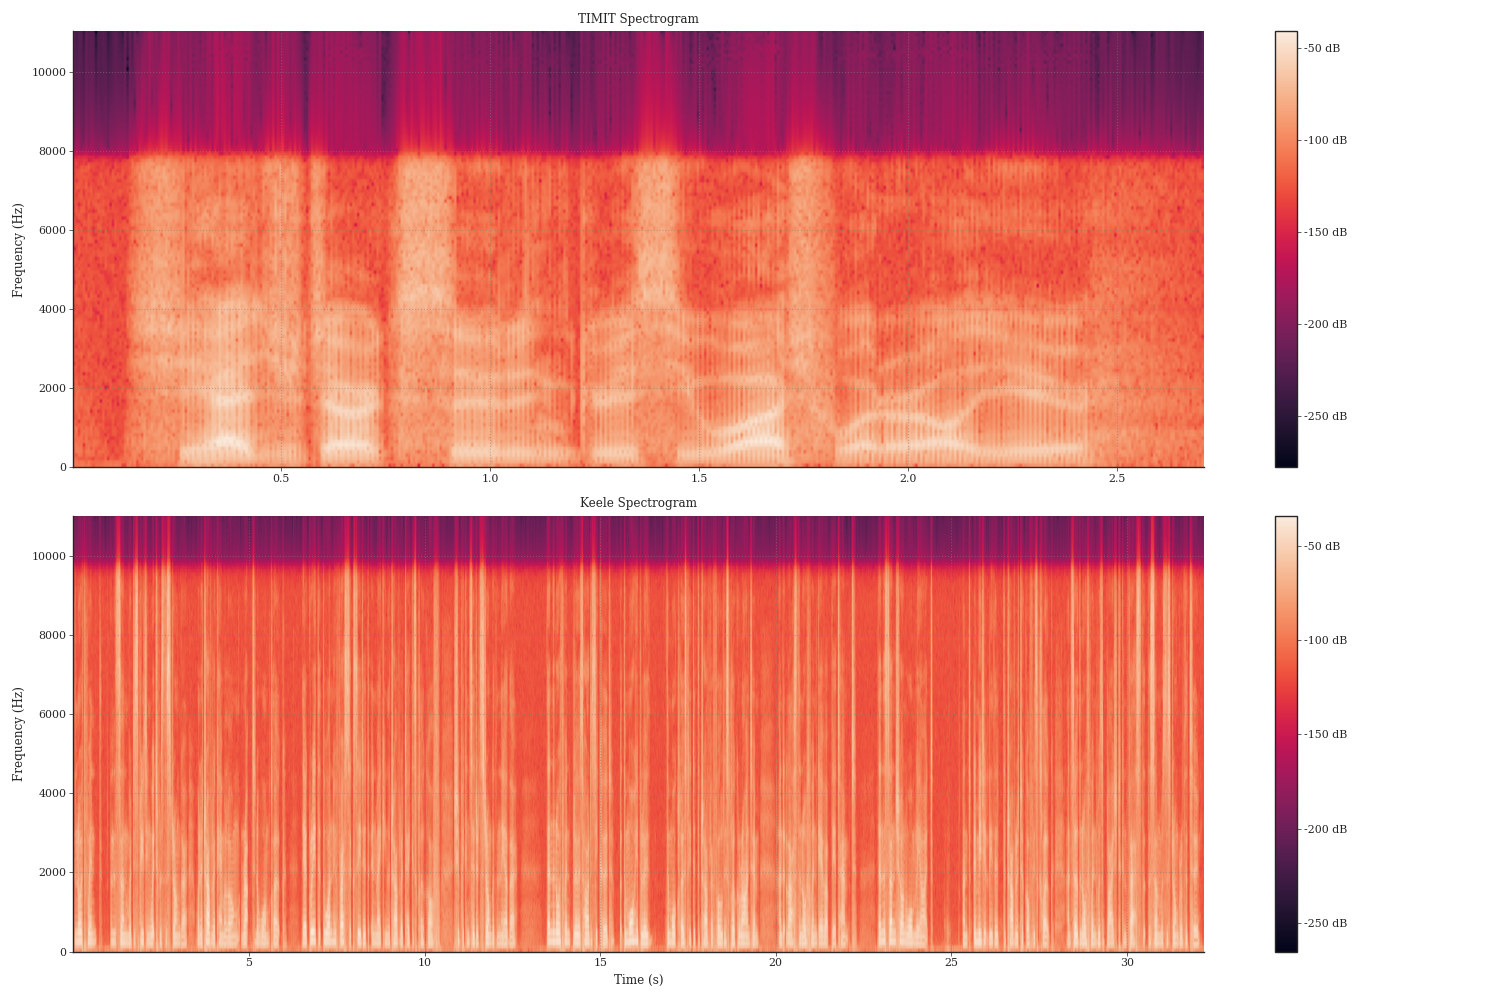

In [8]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
y_timit, sr_t = librosa.load(timit_wav)
y_keele, sr_k = librosa.load(keele_wav)
plt.figure(figsize=(15, 10))

# Plot the first spectrogram
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.specgram(y_timit, Fs=sr_t)
plt.title('TIMIT Spectrogram')
plt.ylabel('Frequency (Hz)')
plt.colorbar(format='%+2.0f dB')

# Plot the second spectrogram
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.specgram(y_keele, Fs=sr_k)
plt.title('Keele Spectrogram')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(format='%+2.0f dB')


plt.show()




In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
import sys

import hydra
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torchaudio
import lightning.pytorch as pl
from scipy.stats import gaussian_kde
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import numpy as np


from IPython.display import Audio, display

from pathlib import Path
from egaznepy.visualize import apply_plot_style
from src.data.mocha_timit_datamodule import MTIMITDataModule
from src.models.pitch_module import PitchModule
from src.models.components.metrics import RCAMetric
from torchmetrics.classification.accuracy import Accuracy



apply_plot_style(0.9)
plt.rcParams['text.usetex'] = False

root_dir = Path(globals()['_dh'][0]).parent
print(root_dir)
import os
os.chdir(root_dir)

config_path_predict_keele = 'logs/eval/runs/keele_test_with joint_noslice/.hydra/config.yaml'
ckpt_path_keele = 'weights/joint/2024-05-29_17-03-54/checkpoints/epoch_135.ckpt'

config_path_predict_timit = 'logs/train/runs/joint_model/.hydra/config.yaml'
ckpt_path_timit = 'logs/train/runs/joint_model/checkpoints/epoch_173.ckpt'


/dataHDD/chsaikeerthi/2024-chirumamilla


In [2]:
config_predict_keele = OmegaConf.load(config_path_predict_keele)
datamodule_keele = hydra.utils.instantiate(config_predict_keele.data, slice_length=50, batch_size= 1,slice=False)
pitch_module_keele: PitchModule = hydra.utils.instantiate(config_predict_keele.model)

config_predict_timit = OmegaConf.load(config_path_predict_timit)
datamodule_timit = hydra.utils.instantiate(config_predict_timit.data, slice_length=50, batch_size= 1,slice=False)
pitch_module_timit: PitchModule = hydra.utils.instantiate(config_predict_timit.model)

del config_predict_keele.trainer.default_root_dir
del config_predict_timit.trainer.default_root_dir


config_predict_keele.trainer.limit_predict_batches = 1
config_predict_timit.trainer.limit_predict_batches = 1


trainer_keele = hydra.utils.instantiate(config_predict_keele.trainer) 
arr_predict_keele = trainer_keele.predict(model=pitch_module_keele, datamodule=datamodule_keele, ckpt_path=ckpt_path_keele)

trainer_timit = hydra.utils.instantiate(config_predict_keele.trainer) 
arr_predict_timit = trainer_timit.predict(model=pitch_module_timit, datamodule=datamodule_timit, ckpt_path=ckpt_path_timit)


/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'extractor' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['extractor'])`.
/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:199: Attribute 'encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['encoder'])`.
You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/site-packages/lightning/pytorch/traine

Preparing data...
Data directory: data/
Should implement the code to check if data is already downloaded and extracted for TIMIT
Data prepared successfully.
Data folder: data/KEELE
Train set length: 1
Validation set length: 1
Test set length: 8
Data set-up done successfully.


Predicting: |          | 0/? [00:00<?, ?it/s]

You have turned on `Trainer(detect_anomaly=True)`. This will significantly slow down compute speed and is recommended only for model debugging.
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_predict_batches=1)` was configured so 1 batch will be used.


Preparing data...
Data directory: data/
Should implement the code to check if data is already downloaded and extracted for TIMIT
Data prepared successfully.
Data folder: data/TIMIT


Restoring states from the checkpoint path at logs/train/runs/joint_model/checkpoints/epoch_173.ckpt
Loaded model weights from the checkpoint at logs/train/runs/joint_model/checkpoints/epoch_173.ckpt


Train set length: 5039
Validation set length: 630
Test set length: 629
Data set-up done successfully.


Predicting: |          | 0/? [00:00<?, ?it/s]

In [3]:
# Extract the first 4 elements - our model

# pitches_predicted = arr_predict[0][0:4]
# gt
corresponding_data_keele = next(iter(datamodule_keele.test_dataloader()))
corresponding_audio_keele = corresponding_data_keele[0][0:4]

# mask_gt = probs_gt > 0.3
#pitches_gt = pitch_module.decoder.idx_pitch[pitches_gt.argmax(dim=-1)]
#pitches_gt = pitches_gt * mask_gt
corresponding_data_timit = next(iter(datamodule_timit.test_dataloader()))
corresponding_audio_timit = corresponding_data_timit[0][0:4]



print("audio",corresponding_audio_keele[0])
print("audio",corresponding_audio_timit[0])

audio tensor([-0.0138,  0.0331, -0.0813,  ...,  0.0011,  0.0011,  0.0010])
audio tensor([ 2.7466e-04, -9.1553e-05, -2.1362e-04,  ...,  2.7466e-04,
         2.1362e-04,  6.1035e-05])


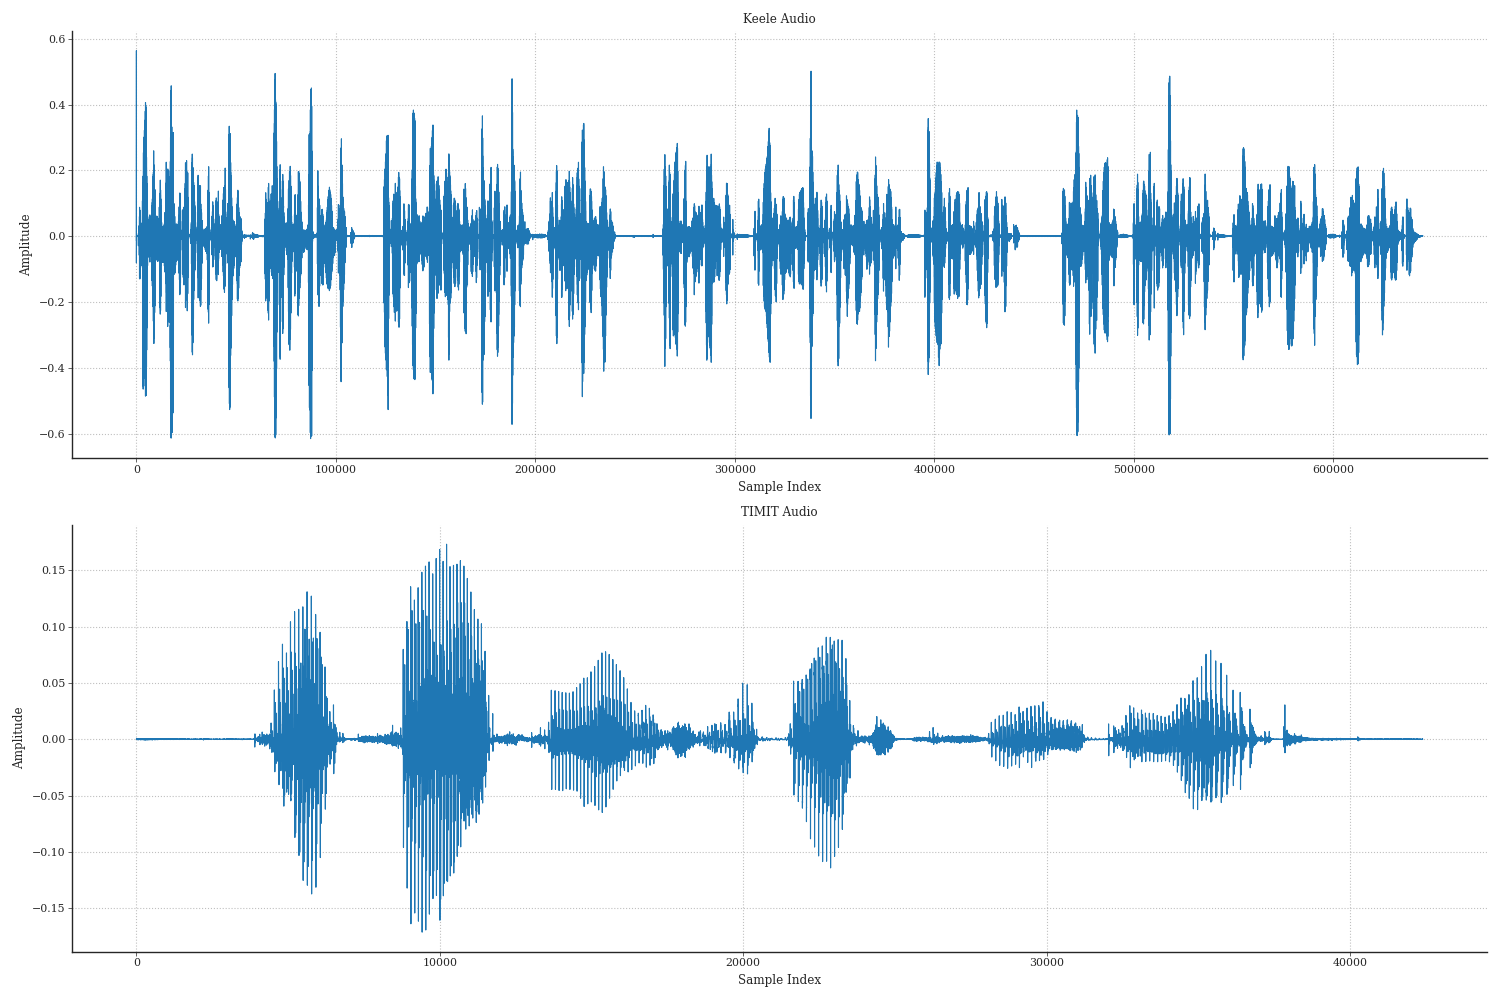

In [4]:
audio_tensor_keele = corresponding_audio_keele[0]
audio_numpy_keele = audio_tensor_keele.numpy()
audio_tensor_timit = corresponding_audio_timit[0]
audio_numpy_timit = audio_tensor_timit.numpy()


plt.figure(figsize=(15, 10))
# Plot the first spectrogram
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(audio_numpy_keele)
plt.xlabel("Sample Index")
plt.title('Keele Audio')
plt.ylabel("Amplitude")
# Plot the second spectrogram
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(audio_numpy_timit)
plt.title('TIMIT Audio')
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()


/tmp/ipykernel_1344242/1658780767.py:5: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=1).
  plt.specgram(corresponding_audio_keele, Fs=sr_t)
/dataHDD/chsaikeerthi/2024-chirumamilla/myenv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7947: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/tmp/ipykernel_1344242/1658780767.py:12: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=1).
  plt.specgram(corresponding_audio_keele, Fs=sr_k)


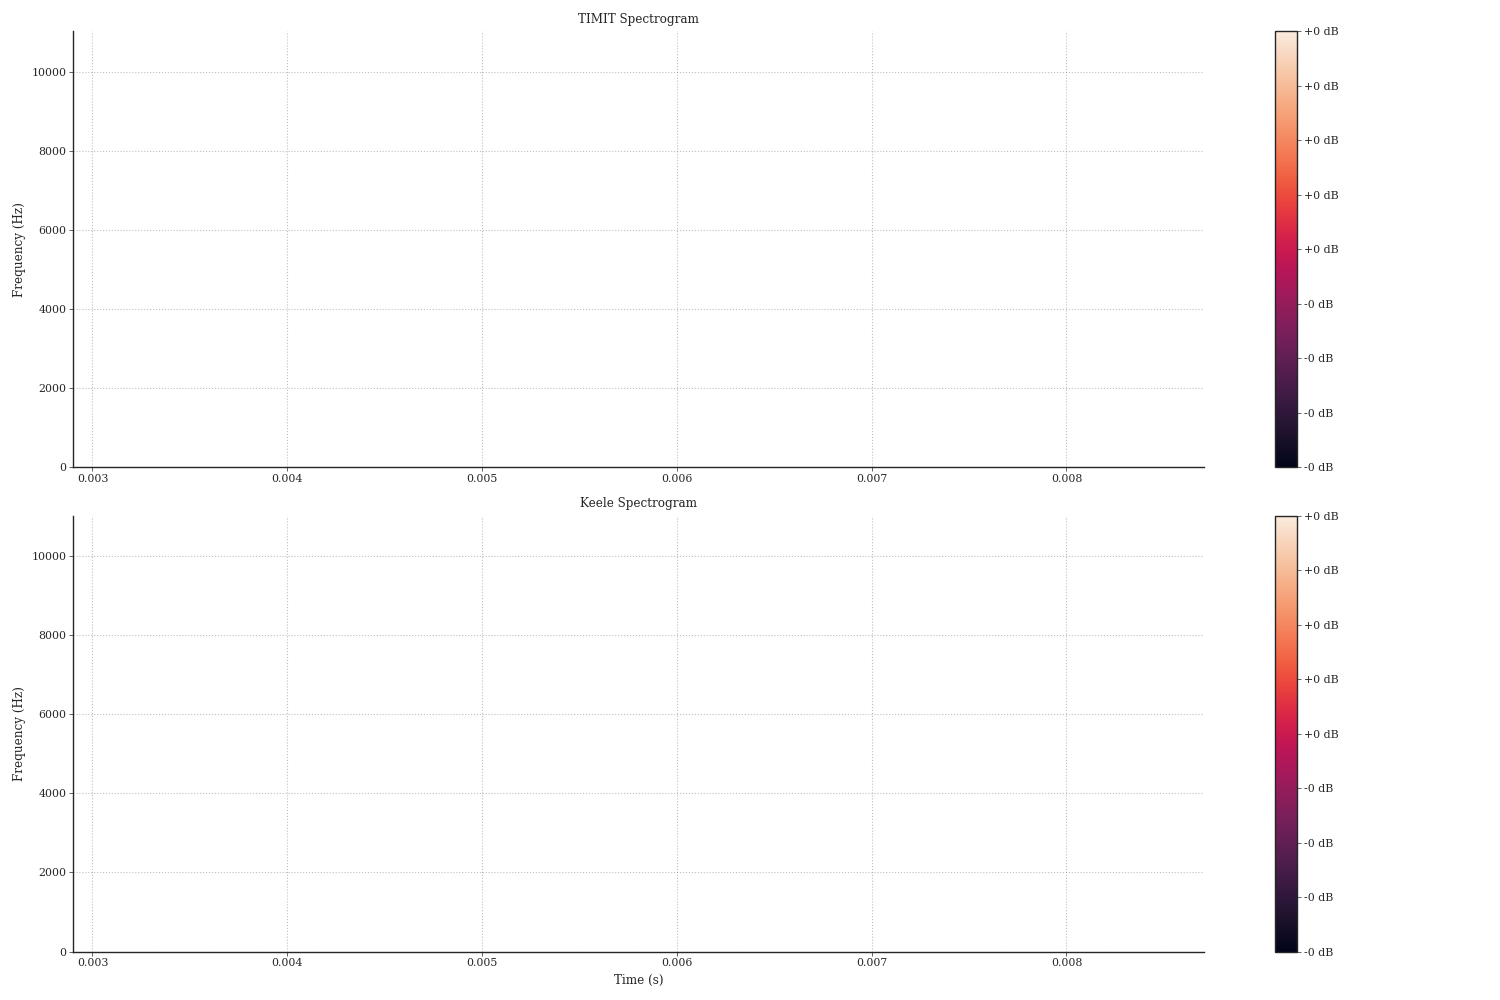

In [9]:
plt.figure(figsize=(15, 10))

# Plot the first spectrogram
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.specgram(corresponding_audio_keele, Fs=sr_t)
plt.title('TIMIT Spectrogram')
plt.ylabel('Frequency (Hz)')
plt.colorbar(format='%+2.0f dB')

# Plot the second spectrogram
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.specgram(corresponding_audio_keele, Fs=sr_k)
plt.title('Keele Spectrogram')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(format='%+2.0f dB')


plt.show()

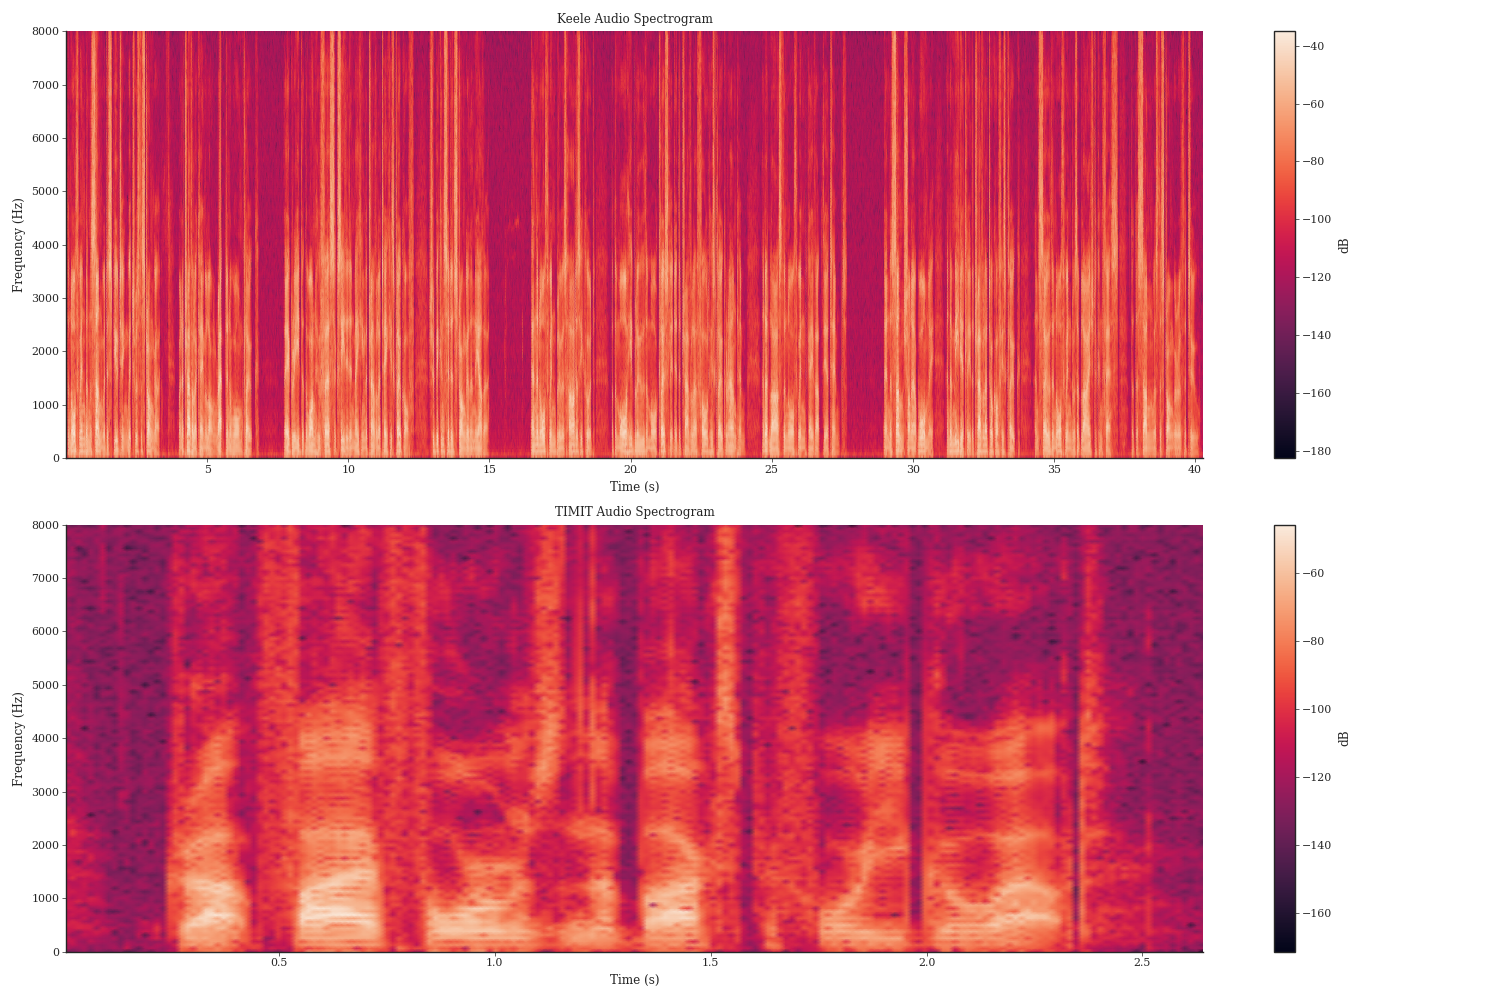

In [10]:
from scipy.signal import spectrogram
frequencies_keele, times_keele, Sxx_keele = spectrogram(audio_numpy_keele, fs=16000)

# Compute spectrogram for TIMIT audio
frequencies_timit, times_timit, Sxx_timit = spectrogram(audio_numpy_timit, fs=16000)

plt.figure(figsize=(15, 10))

# Plot the first spectrogram
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.pcolormesh(times_keele, frequencies_keele, 10 * np.log10(Sxx_keele), shading='gouraud')
plt.colorbar(label='dB')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title('Keele Audio Spectrogram')

# Plot the second spectrogram
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.pcolormesh(times_timit, frequencies_timit, 10 * np.log10(Sxx_timit), shading='gouraud')
plt.colorbar(label='dB')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title('TIMIT Audio Spectrogram')

plt.tight_layout()
plt.show()